In [1]:
import pandas as pd

file_path = "nonoilgdp_2024.csv"
data = pd.read_csv(file_path)
print("Columns in the dataset:", data.columns)
print(data.head())

Columns in the dataset: Index(['Years', 'Non-Oil GDP Growth'], dtype='object')
   Years  Non-Oil GDP Growth
0   1974                38.7
1   1975                26.6
2   1976                 4.2
3   1977                 4.4
4   1978                 9.7


In [2]:
print(data.isnull().sum())

Years                 0
Non-Oil GDP Growth    0
dtype: int64


In [3]:
data['Years'] = pd.to_datetime(data['Years'], format='%Y')
data.set_index('Years', inplace=True)
data.sort_index(inplace=True)

In [4]:
data

,Non-Oil GDP Growth
Years,
1974-01-01,38.7
1975-01-01,26.6
1976-01-01,4.2
1977-01-01,4.4
1978-01-01,9.7
1979-01-01,7.5
1980-01-01,8.1
1981-01-01,9.7
1982-01-01,6.2


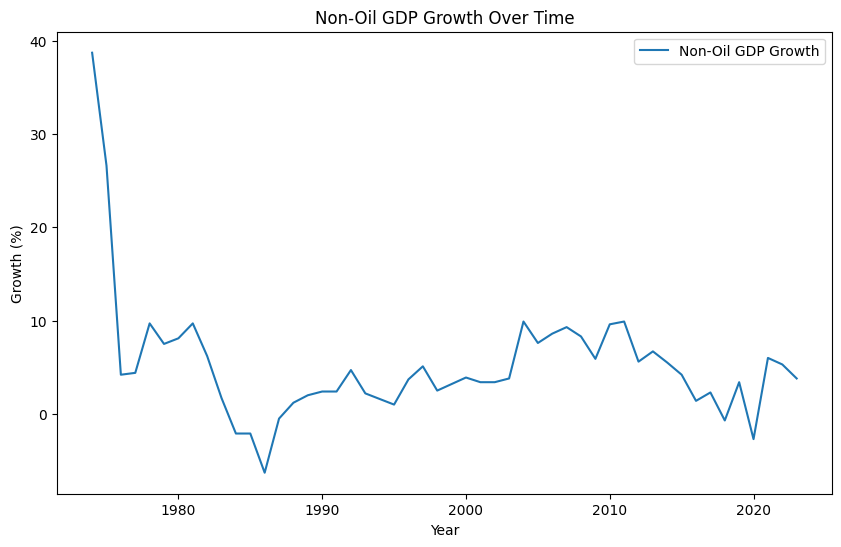

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Non-Oil GDP Growth'], label='Non-Oil GDP Growth')
plt.title('Non-Oil GDP Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.show()  

# Ducky FUller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(data['Non-Oil GDP Growth'])

Results of Dickey-Fuller Test:
Test Statistic                -6.470910e+00
p-value                        1.367937e-08
#Lags Used                     1.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


In [7]:
data_diff = data.diff().dropna()
test_stationarity(data_diff['Non-Oil GDP Growth'])

Results of Dickey-Fuller Test:
Test Statistic                -6.434726e+00
p-value                        1.663719e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test
train = data.loc[data.index < '2020-01-01']
test = data.loc[data.index >= '2020-01-01']

# Fit ARIMA model
model = ARIMA(train['Non-Oil GDP Growth'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)

c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


2020-01-01    5.491282
2021-01-01    5.002910
2022-01-01    5.116958
2023-01-01    5.090325
2024-01-01    5.096545
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model = ExponentialSmoothing(train['Non-Oil GDP Growth'], trend='add', seasonal=None)
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)

2020-01-01    3.281347
2021-01-01    3.162693
2022-01-01    3.044040
2023-01-01    2.925387
2024-01-01    2.806734
Freq: YS-JAN, dtype: float64


c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [11]:
import numpy as np

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create lag features
for i in range(1, 6):
    data['lag_{}'.format(i)] = data['Non-Oil GDP Growth'].shift(i)
data.dropna(inplace=True)

# Split into train and test
X_train = data.loc[data.index < '2020-01-01'].drop('Non-Oil GDP Growth', axis=1)
y_train = data.loc[data.index < '2020-01-01']['Non-Oil GDP Growth']
X_test = data.loc[data.index >= '2020-01-01'].drop('Non-Oil GDP Growth', axis=1)
y_test = data.loc[data.index >= '2020-01-01']['Non-Oil GDP Growth']

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecast next 5 years
forecasts = []
last_known = data['Non-Oil GDP Growth'].iloc[-5:].values

for i in range(5):
    features = np.roll(last_known, -i)[:5]
    forecast = model.predict([features])
    forecasts.append(forecast[0])
    last_known = np.append(last_known, forecast[0])

print(forecasts)

[np.float64(4.144999999999999), np.float64(1.8020000000000016), np.float64(7.297), np.float64(3.949999999999997), np.float64(4.627999999999993)]


c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: Use

In [14]:
forecasts = [round(val, 2) for val in forecasts]

In [15]:
imf_projections = [5.3, 3.8, 3.4, 4.4]
print('Forecasted Values:', forecasts)
print('IMF Projections:', imf_projections)

Forecasted Values: [np.float64(4.14), np.float64(1.8), np.float64(7.3), np.float64(3.95), np.float64(4.63)]
IMF Projections: [5.3, 3.8, 3.4, 4.4]


In [18]:
# pip install pmdarima

# **Trying Ensemble Learning Technique**

In [22]:
pip install --upgrade pmdarima numpy


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -----------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB ? eta -:--:--
   --- -------------

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject